## COVID-19 Analysis
Using Julia

Aim:
1. To analyze up to date data on the COVID-19 epidemic and find a correlation between how it is spread and where.
2. Interpret results and their trends.

In [1]:
# Import packages to be used
using Pkg
using CSV
using DataFrames 
using Query
using StatsPlots

In [2]:
# Read in data from the csv file from https://www.kaggle.com/sudalairajkumar/novel-corona-virus-2019-dataset#2019_nCoV_data.csv
data = CSV.read(FILEPATH);

In [3]:
# create data frame containing relevant columns.
df = DataFrame(date = data[:2], cities = data[:3], country = data[:4], confirmed = data[:6], deaths = data[:7], recovered = data[:8])

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[3]:1
└ @ Core In[3]:1
┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[3]:1
└ @ Core In[3]:1
┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[3]:1
└ @ Core In[3]:1
┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[3]:1
└ @ Core In[3]:1
┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[3]:1
└ @ Core In[3]:1
┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[3]:1
└ @ Core In[3]:1


,date,cities,country,confirmed,deaths,recovered
,String,String⍰,String,Float64,Float64,Float64
1,01/22/2020 12:00:00,Anhui,China,1.0,0.0,0.0
2,01/22/2020 12:00:00,Beijing,China,14.0,0.0,0.0
3,01/22/2020 12:00:00,Chongqing,China,6.0,0.0,0.0
4,01/22/2020 12:00:00,Fujian,China,1.0,0.0,0.0
5,01/22/2020 12:00:00,Gansu,China,0.0,0.0,0.0
6,01/22/2020 12:00:00,Guangdong,China,26.0,0.0,0.0
7,01/22/2020 12:00:00,Guangxi,China,2.0,0.0,0.0
8,01/22/2020 12:00:00,Guizhou,China,1.0,0.0,0.0
9,01/22/2020 12:00:00,Hainan,China,4.0,0.0,0.0


In [4]:
# Filter data frame for data from the most recent day.
filter = DataFrame(df |> @filter(_.date == "02/17/2020 22:00:00"))

,date,cities,country,confirmed,deaths
,String,String⍰,String,Float64,Float64
1,02/17/2020 22:00:00,Hubei,Mainland China,59989.0,1789.0
2,02/17/2020 22:00:00,Guangdong,Mainland China,1322.0,4.0
3,02/17/2020 22:00:00,Henan,Mainland China,1246.0,16.0
4,02/17/2020 22:00:00,Zhejiang,Mainland China,1171.0,0.0
5,02/17/2020 22:00:00,Hunan,Mainland China,1006.0,3.0
6,02/17/2020 22:00:00,Anhui,Mainland China,973.0,6.0
7,02/17/2020 22:00:00,Jiangxi,Mainland China,930.0,1.0
8,02/17/2020 22:00:00,Jiangsu,Mainland China,626.0,0.0
9,02/17/2020 22:00:00,Chongqing,Mainland China,553.0,5.0


In [5]:
# Use groupby to group data by their countries.
gd = groupby(filter, :country, skipmissing = true);

In [6]:
# Combine data for countries.
corona_country = combine(gd, :confirmed => sum, :deaths => sum, :recovered => sum);

In [7]:
# Sort the data in descending order starting from the country with the most confirmed cases.
corona_sorted = sort(corona_country, :confirmed_sum, rev=true)

,country,confirmed_sum,deaths_sum,recovered_sum
,String,Float64,Float64,Float64
1,Mainland China,72364.0,1863.0,12455.0
2,Others,454.0,0.0,0.0
3,Singapore,77.0,0.0,24.0
4,Japan,66.0,1.0,12.0
5,Hong Kong,60.0,1.0,2.0
6,Thailand,35.0,0.0,15.0
7,South Korea,30.0,0.0,10.0
8,Malaysia,22.0,0.0,7.0
9,Taiwan,22.0,1.0,2.0


In [8]:
using Plots

┌ Warning: `head(df::AbstractDataFrame)` is deprecated, use `first(df, 6)` instead.
│   caller = top-level scope at In[9]:1
└ @ Core In[9]:1


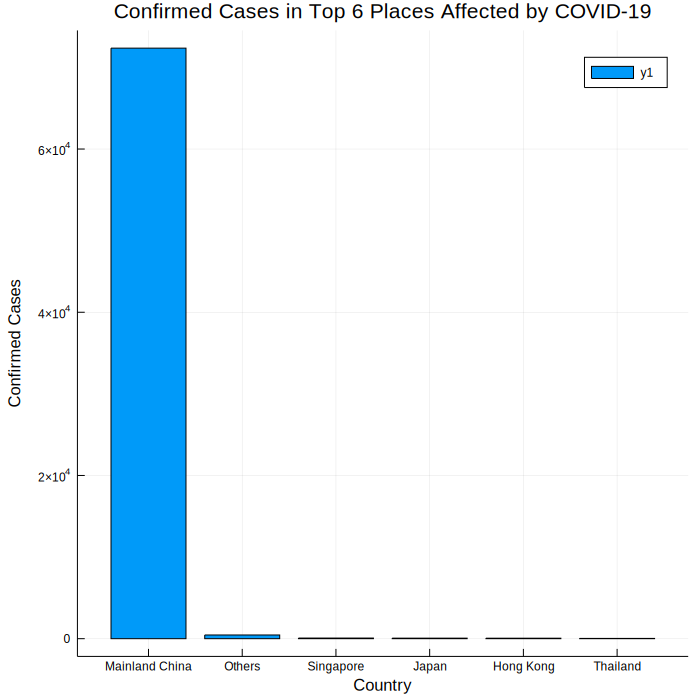

In [9]:
# Create a bar chart to show the top 6 countries affected.
@df head(corona_sorted) bar(:country, :confirmed_sum, size = (700, 700), title = ("Confirmed Cases in Top 6 Places Affected by COVID-19"), xlabel = ("Country"), ylabel = ("Confirmed Cases"))

The above bar chart compares the number of confirmed cases in the top 6 countries with the greatest number of reported infections.

In [10]:
using DataFramesMeta

In [11]:
using Query

In [12]:
# Filter the data to include data on cities in the US.
filter_US = DataFrame(filter |> @filter(_.country == "US"))

,date,cities,country,confirmed,deaths,recovered
,String,String⍰,String,Float64,Float64,Float64
1,02/17/2020 22:00:00,"Chicago, IL",US,2.0,0.0,2.0
2,02/17/2020 22:00:00,"San Benito, CA",US,2.0,0.0,0.0
3,02/17/2020 22:00:00,"San Diego County, CA",US,2.0,0.0,0.0
4,02/17/2020 22:00:00,"Santa Clara, CA",US,2.0,0.0,0.0
5,02/17/2020 22:00:00,"Boston, MA",US,1.0,0.0,0.0
6,02/17/2020 22:00:00,"Los Angeles, CA",US,1.0,0.0,0.0
7,02/17/2020 22:00:00,"Madison, WI",US,1.0,0.0,0.0
8,02/17/2020 22:00:00,"Orange, CA",US,1.0,0.0,0.0
9,02/17/2020 22:00:00,"San Antonio, TX",US,1.0,0.0,0.0


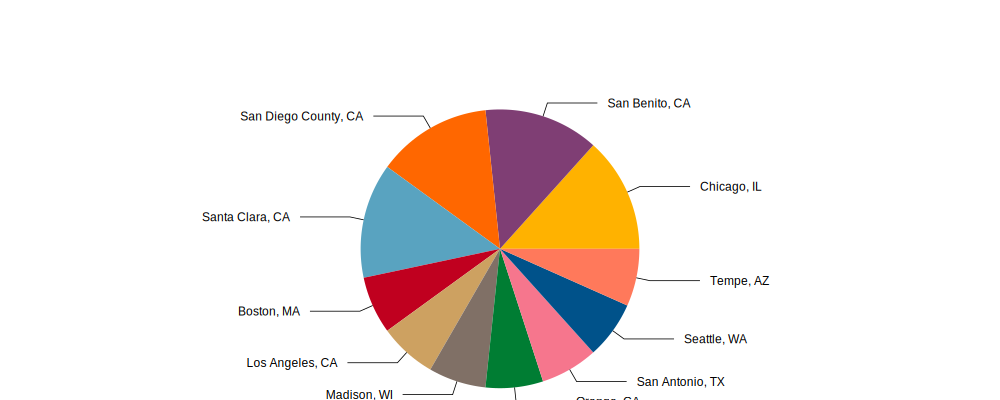

In [13]:
# Create a pie-chart showing the distribution of confirmed cases in cities in the US.
@df filter_US pie(:cities, :confirmed, size = (1000, 400))

The above pie-chart shows the proportion of confirmed COVID-19 cases per major city to the total number of confirmed cases in the US.

In [14]:
df_time = DataFrame(date = data[:2], confirmed = data[:6], deaths = data[:7], recovered = data[:8]);

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[14]:1
└ @ Core In[14]:1
┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[14]:1
└ @ Core In[14]:1
┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[14]:1
└ @ Core In[14]:1
┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[14]:1
└ @ Core In[14]:1


In [15]:
gd_time = groupby(df_time, :date, skipmissing = true);

In [16]:
# Combine the data by adding all elements in each date.
corona_time = combine(gd_time, :confirmed => sum, :deaths => sum, :recovered => sum)

,date,confirmed_sum,deaths_sum,recovered_sum
,String,Float64,Float64,Float64
1,01/22/2020 12:00:00,555.0,0.0,0.0
2,01/23/2020 12:00:00,653.0,18.0,30.0
3,01/24/2020 12:00:00,941.0,26.0,36.0
4,01/25/2020 22:00:00,2019.0,56.0,49.0
5,01/26/2020 23:00:00,2794.0,80.0,54.0
6,01/27/2020 20:30:00,4473.0,107.0,63.0
7,01/28/2020 23:00:00,6057.0,132.0,110.0
8,01/29/2020 21:00:00,7783.0,170.0,133.0
9,01/30/2020 21:30:00,9776.0,213.0,187.0


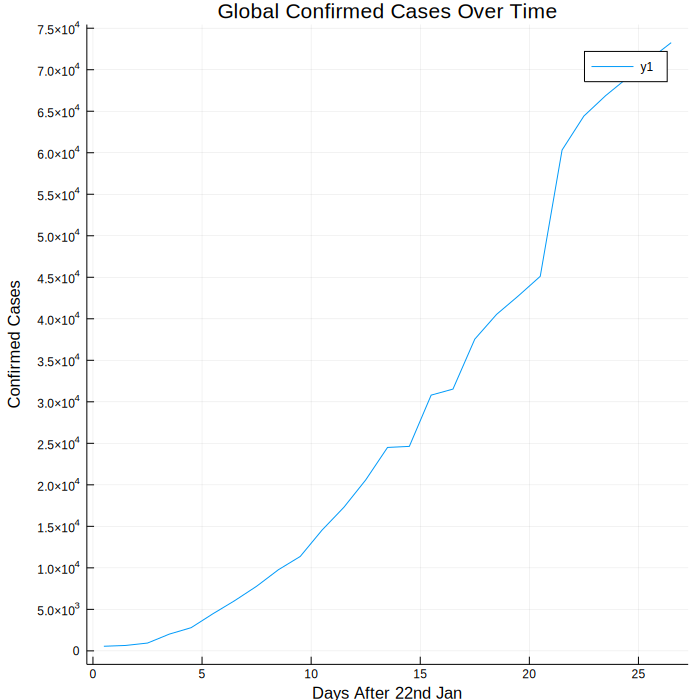

In [17]:
# Create a line plot to show increase in confirmed cases per day (globally).
@df corona_time plot(:date, :confirmed_sum, size = (700, 700), title = ("Global Confirmed Cases Over Time"), xlabel = ("Days After 22nd Jan"), ylabel = ("Confirmed Cases"), yaxis = (0:5000:80000), xaxis = (0:5:30))


The above graph shows the cumulative number of confirmed cases reported on subsequent days following the first documented data in the set. 

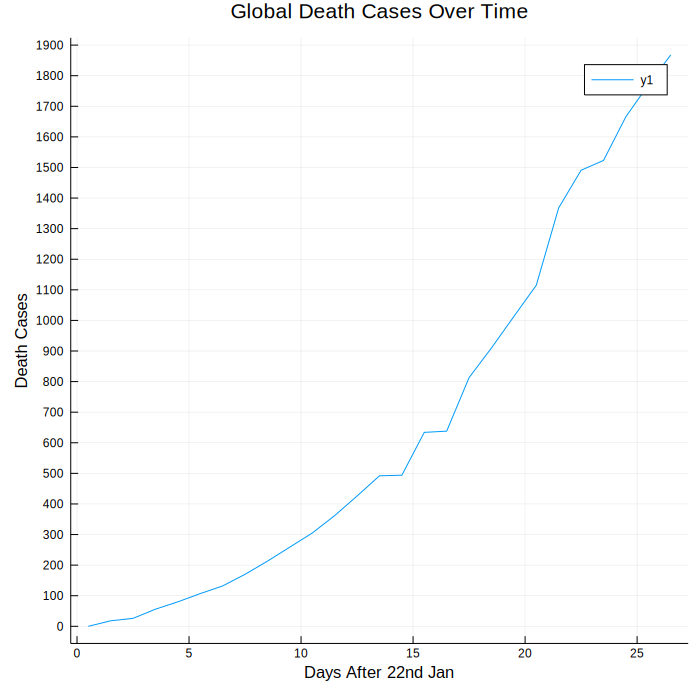

In [18]:
# Create a line plot to show increase in death cases per day (globally).
@df corona_time plot(:date, :deaths_sum, size = (700, 700), title = ("Global Death Cases Over Time"), xlabel = ("Days After 22nd Jan"), ylabel = ("Death Cases"), yaxis = (0:100:2000), xaxis = (0:5:30))


The above graph shows the cumulative number of death cases reported on subsequent days following the first documented data in the set. This can be used to project how the number of death cases would fluctuate over time.

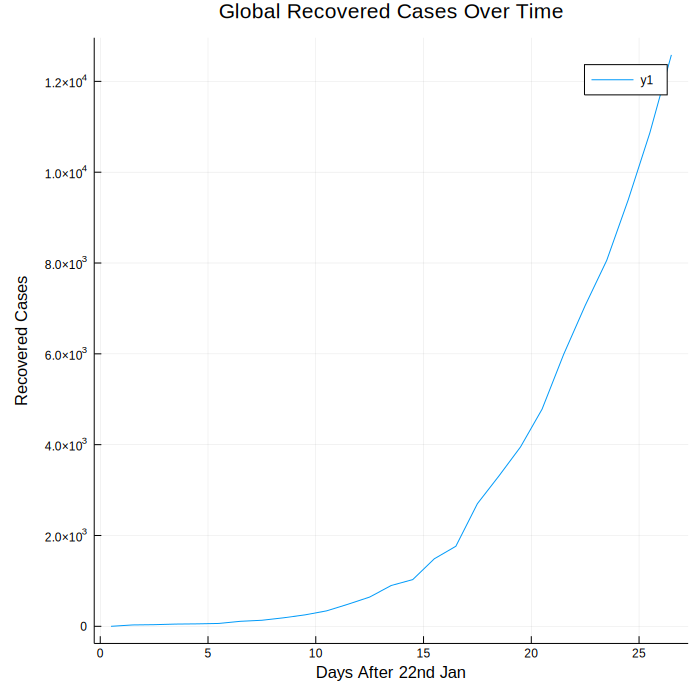

In [19]:
# Create a line plot to show increase in recovered cases per day (globally).
@df corona_time plot(:date, :recovered_sum, size = (700, 700), title = ("Global Recovered Cases Over Time"), xlabel = ("Days After 22nd Jan"), ylabel = ("Recovered Cases"), yaxis = (0:2000:14000), xaxis = (0:5:30))


The above graph shows the cumulative number of recovered cases reported on subsequent days following the first documented data in the set. This can be used to project how the number of recovered cases would fluctuate over time.

In [20]:
# Filter out the data relevant to China.
filter2 = DataFrame(df |> @filter(_.country != "China" && _.country != "Mainland China"))

,date,cities,country,confirmed,deaths,recovered
,String,String⍰,String,Float64,Float64,Float64
1,01/22/2020 12:00:00,Washington,US,1.0,0.0,0.0
2,01/22/2020 12:00:00,missing,Japan,2.0,0.0,0.0
3,01/22/2020 12:00:00,missing,Thailand,2.0,0.0,0.0
4,01/22/2020 12:00:00,missing,South Korea,1.0,0.0,0.0
5,01/23/2020 12:00:00,Hong Kong,Hong Kong,2.0,0.0,0.0
6,01/23/2020 12:00:00,Macau,Macau,2.0,0.0,0.0
7,01/23/2020 12:00:00,Taiwan,Taiwan,1.0,0.0,0.0
8,01/23/2020 12:00:00,Washington,US,1.0,0.0,0.0
9,01/23/2020 12:00:00,missing,Japan,1.0,0.0,0.0


In [21]:
gd_nochina = groupby(filter2, :country, skipmissing = true);

In [23]:
# Create a data frame containing the country and their confirmed, death and recovered cases.
df_ratio = DataFrame(Country = corona_sorted[:1], Confirmed = corona_sorted[:2], Deaths = corona_sorted[:3], Recovered = corona_sorted[:4])


┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[23]:1
└ @ Core In[23]:1
┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[23]:1
└ @ Core In[23]:1
┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[23]:1
└ @ Core In[23]:1
┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[23]:1
└ @ Core In[23]:1


,Country,Confirmed,Deaths,Recovered
,String,Float64,Float64,Float64
1,Mainland China,72364.0,1863.0,12455.0
2,Others,454.0,0.0,0.0
3,Singapore,77.0,0.0,24.0
4,Japan,66.0,1.0,12.0
5,Hong Kong,60.0,1.0,2.0
6,Thailand,35.0,0.0,15.0
7,South Korea,30.0,0.0,10.0
8,Malaysia,22.0,0.0,7.0
9,Taiwan,22.0,1.0,2.0


In [24]:
# Calculate the percentage of recovered over the sum of confirmed cases and deaths, and store it in a new column.
df_ratio[:Recovery_Percentage] = 100*(df_ratio[:Recovered] ./ (df_ratio[:Confirmed] + df_ratio[:Deaths]));

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[24]:1
└ @ Core In[24]:1
┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[24]:1
└ @ Core In[24]:1
┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[24]:1
└ @ Core In[24]:1
┌ Warning: `setindex!(df::DataFrame, v::AbstractVector, col_ind::ColumnIndex)` is deprecated, use `begin
│     df[!, col_ind] = v
│     df
│ end` instead.
│   caller = top-level scope at In[24]:1
└ @ Core In[24]:1


In [25]:
df_ratio

,Country,Confirmed,Deaths,Recovered,Recovery_Percentage
,String,Float64,Float64,Float64,Float64
1,Mainland China,72364.0,1863.0,12455.0,16.7796
2,Others,454.0,0.0,0.0,0.0
3,Singapore,77.0,0.0,24.0,31.1688
4,Japan,66.0,1.0,12.0,17.9104
5,Hong Kong,60.0,1.0,2.0,3.27869
6,Thailand,35.0,0.0,15.0,42.8571
7,South Korea,30.0,0.0,10.0,33.3333
8,Malaysia,22.0,0.0,7.0,31.8182
9,Taiwan,22.0,1.0,2.0,8.69565


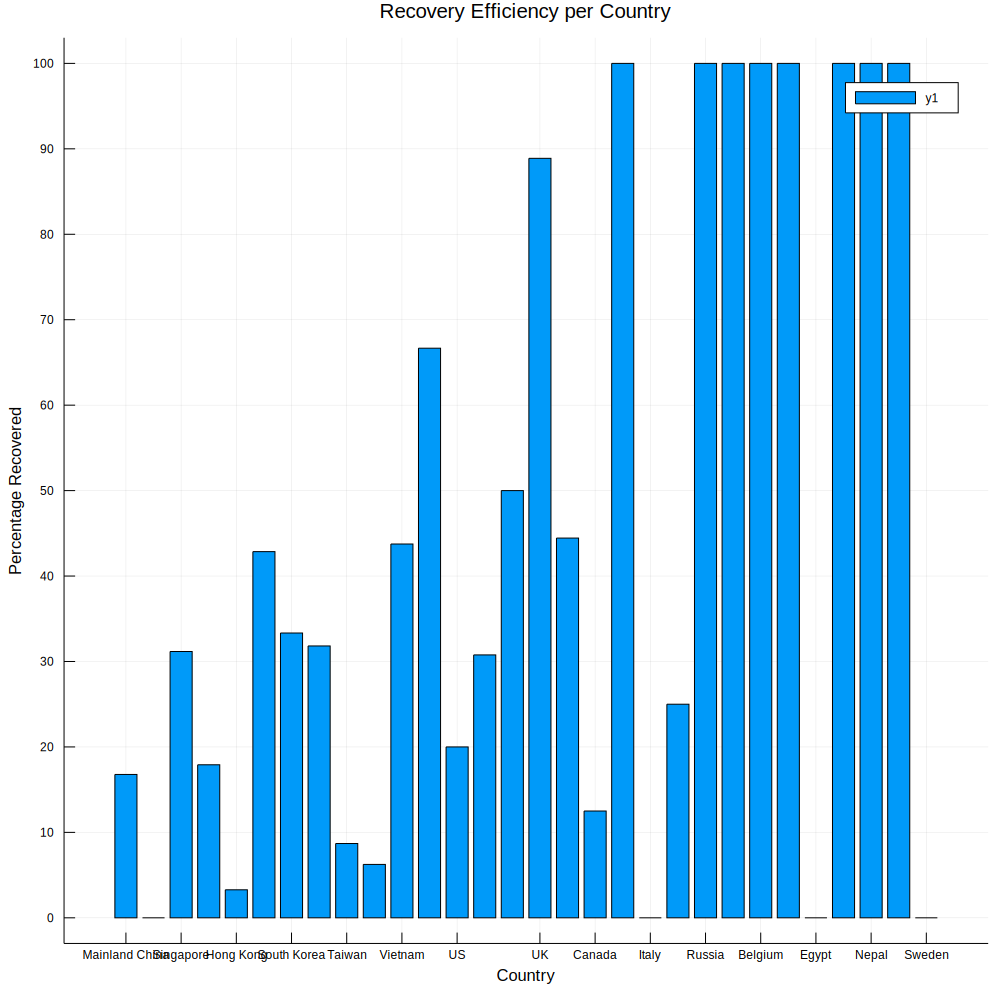

In [26]:
# Create a bar chart showing the efficiency of recovery per country.
@df df_ratio bar(:Country, :Recovery_Percentage, size = (1000, 1000), title = ("Recovery Efficiency per Country"), xlabel = ("Country"), ylabel = ("Percentage Recovered"), yaxis = (0:10:100))

The above bar chart quantifies the recovery efficiency (defined as the percentage of recovered cases with respect to the sum of confirmed and death cases). The higher this value, the "better" a country is at handling situations of mass viral infections and epidemics/health crises.